In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## Задание 1
Исправить код применения оператора Собеля, таким образом, чтобы оператор применялся по обоим направлениям (x и y).


In [ ]:
img = cv.imread("sudoku.png", 0)

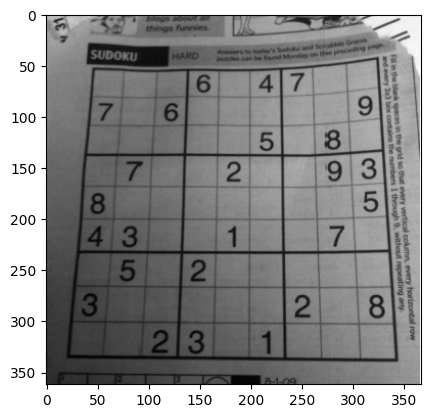

In [ ]:
plt.imshow(img, cmap="gray")

In [ ]:
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)
sobelxy = sobelx + sobely

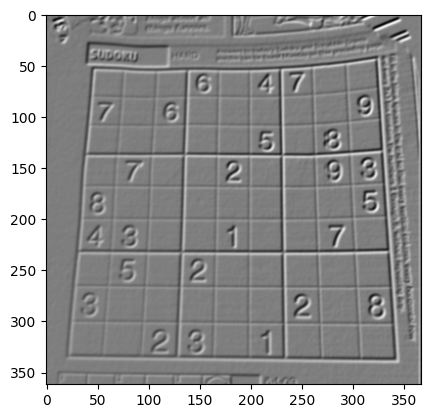

In [ ]:
plt.imshow(sobelxy, cmap="gray")

## Задание 2

Создать оконное приложение, отображающее результат применения того или иного фильтра, интерфейс, позволяющий варьировать значения параметров фильтра и смотреть, как это влияет на результат в реальном времени (обновляя выводимое изображение).

In [ ]:
import numpy as np
import cv2 as cv


def nothing(x):
    pass

img_path = 'sudoku.png'

img_original = cv.imread(img_path, 0)
img = img_original

window_name = 'Canny'

cv.namedWindow(window_name, cv.WINDOW_NORMAL)

cv.createTrackbar('threshold1',window_name,0,500,nothing)
cv.createTrackbar('threshold2',window_name,0,500,nothing)

apertureLabel = 'apertureSize \n0:3 \n1:5 \n2:7'
cv.createTrackbar(apertureLabel,window_name,0,2,nothing)
values = [3, 5, 7]

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch,window_name,0,1,nothing)
while(1):
    cv.imshow(window_name,img)
    k = cv.waitKey(1) & 0xFF

    if k == 27 or cv.getWindowProperty(window_name, cv.WND_PROP_VISIBLE) < 1:
        break

    # get current positions of four trackbars
    s = cv.getTrackbarPos(switch,window_name)

    th1 = cv.getTrackbarPos('threshold1',window_name)
    th2 = cv.getTrackbarPos('threshold2',window_name)

    ap_idx = cv.getTrackbarPos(apertureLabel,window_name)

    if s == 0:
        img = img_original
    else:
        img = cv.Canny(img_original, threshold1=th1, threshold2=th2, apertureSize=values[ap_idx])

cv.destroyAllWindows()

## Задание 3

К изображению hong.png из папки необходимо подобрать такую морфологическую операцию, чтобы устранить с таблички слова, написанные черным цветом.

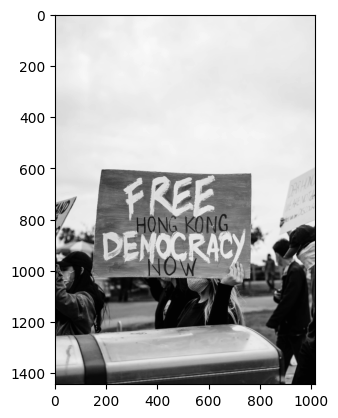

In [ ]:
img = cv.imread("hong.png", 0)
plt.imshow(img, cmap="gray")

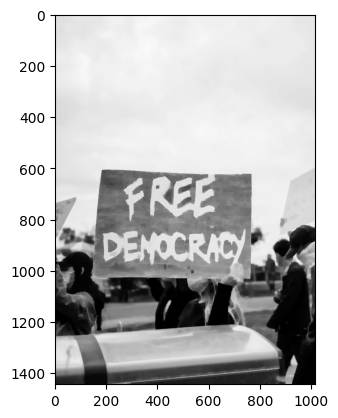

In [ ]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (10,10))
img_res = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
plt.imshow(img_res, cmap="gray")